In [2]:
import matplotlib.pyplot as plt #Βιβλιοθήκη γραφικών και λέμε στο Jupyterνα κάνει Render τα γραφικά μέσα στο Notebook
%matplotlib inline 
import numpy as np #Βιβλιοθήκη Αριθμητικών συναρτήσεων 

Ξεκινάμε με μια απλη επανάληψη του πως μπορούμε να κατασκευάσουμε ένα γραμμικό χώρο και να σχεδιάσουμε τη συνάρτηση ημίτονο απο 0 έως 2π.

Text(0,0.5,u'Y')

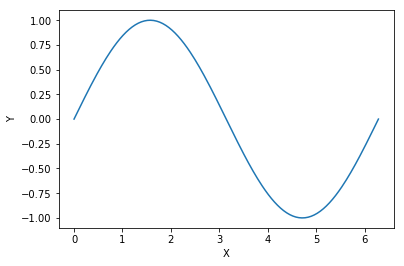

In [3]:
xx=np.linspace(0.,2.*np.pi,200) #Δημιουργούμε ένα ομοιογενή χώρο 200 στοιχείων απο 0 έως 2π
plt.plot(xx,np.sin(xx)) #Εκτυπώνουμε τα σημεία (x,sin(x)) χρησιμοποιώντας την συνάρτηση sin() της Numpy
plt.xlabel('X')
plt.ylabel('Y')

Παρακαάτω θα προσπαθήσουμε να εκτιμήσουμε τη περιοδικότητα της ηλιακής δραστηριότητας μέσω του αριθμού του κηλίδων $R$.

Ο αριθμός των κηλίδων δίνεται από τη σχέση $ R= N_s + 10  N_g$ όπου $N_s$ ο αριθμός των κηλίδων και $N_g$ ο αριθμών των ομάδων (groups) που διακρίνονται πάνω στον ηλιακό δίσκο.
Τα δεδομένα όπως φαίνονται και παρακάτω μέσα από την εντολή **head** του linux bash (μπορούμε να εκτελέσουμε μια εντολή του bash (για linux) ή του command line (για windows) μέσω του ! (θαυμαστικό)) εκτείνονται από το 1818 σε 
8 στήλες.

Στήλη 1-3 έτος, μήνας, μέρα

Στήλη 4 ημερομηνία σε έτη (δεκαδική μορφή)

Στήλη 5: Ημερήσιος αριθμός κηλίδων. Στη περίπτωση που δεν έχουμε διαθέσιμες μετρήσεις έχουμε τον αριθμό -1

Στήλη 6: Τυπική διακύμανση του αριθμού των κηλίδων

Στήλη 7: Αριθμός παρατηρήσεων για τη συγκεκριμένη ήμερα.

Στήλη 8: Κενό αν η παρατήρηση θεωρείται έγκυρη, '*' αν υπάρχει περίπτωση επανεξέτασης.

In [4]:
!head SN_d_tot_V2.0.csv

1818;01;01;1818.001;  -1; -1.0;   0;1
1818;01;02;1818.004;  -1; -1.0;   0;1
1818;01;03;1818.007;  -1; -1.0;   0;1
1818;01;04;1818.010;  -1; -1.0;   0;1
1818;01;05;1818.012;  -1; -1.0;   0;1
1818;01;06;1818.015;  -1; -1.0;   0;1
1818;01;07;1818.018;  -1; -1.0;   0;1
1818;01;08;1818.021;  65; 10.2;   1;1
1818;01;09;1818.023;  -1; -1.0;   0;1
1818;01;10;1818.026;  -1; -1.0;   0;1


In [5]:
A=np.loadtxt('SN_d_tot_V2.0.csv',delimiter=';') #Εισάγουμε τα δεδομένα μέσα σε ένα δισδιάστατο πίνακα (A)

In [6]:
t=A[:,3] #χρονος (δεκαδικη μορφη σε ετη)
R=A[:,4] #αριθμος κηλιδων
N=R.shape[0] #αριθμος ολων των παρατηρησεων

Για λογους ευκολιας θα θεωρησουμε οτι τις ημερες οπου δεν ειχαμε παρατηρησεις δεν ειχαμε κηλιδες, αρα αναζητουμε τα σημεια του πινακα των παρατηρησεων R οπου υπαρχει η τιμη -1. 

Στα σημεια αυτα θα βαλουμε τη τιμη 0.

In [7]:
R[R==-1]=0.

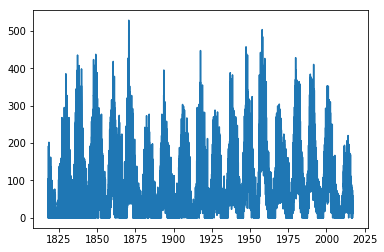

In [8]:
plt.plot(t,R)
#plt.xlim(1860,1861)

## Χρήση του αλγορίθμου FFT
(https://en.wikipedia.org/wiki/Fast_Fourier_transform) 

Μέσω του αλγορίθμού FFT που εμπεριέχεται στη βιβλιοθήκη numpy.fft [1] θα υπολογίσουμε το διακριτό μετασχηματισμό fourier της χρονοσειράς $R$ (αριθμός κηλίδων) 
$$
{\displaystyle X_{k}=\sum _{n=0}^{N-1}x_{n}e^{-i2\pi kn/N}\qquad k=0,\dots ,N-1.}
$$

[1] Cooley, James W., and John W. Tukey, 1965, "An algorithm for the
        machine calculation of complex Fourier series," *Math. Comput.*
        19: 297-301.
        https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm

In [9]:
import numpy.fft as ff

In [10]:
dt=t[400]-t[399] #Χρονική διαφορά ανάμεσα σε δύο παρατηρήσεις (δεκαδική μορφή)
print('Χρονική διαφορά ανάμεσα στη παρατήρηση 400 και 399: {:.4f}'.format(dt)) #Εκτύπωσε τη (μεχρι 4 δεκαδικα)
freq=ff.fftfreq(N,d=dt) #Χώρος συχνοτήτων για τις συγκεκριμένες παρατηρήσεις μέσω της βιβλιοθηκης fft της numpy
fR=np.abs(ff.fft(R))/N  #Πλατος του σήματος για τις παραπάνω συχνότητες

Χρονική διαφορά ανάμεσα στη παρατήρηση 400 και 399: 0.0020


θα κρατήσουμε μόνο τις θετικές συχνότητες (ο μετασχηματισμός είναι συμμετρικός ως προς τη συχνότητα 0)

In [11]:
F=freq[freq>0]
T=1/F #περιοδος
FR=fR[freq>0]

Text(0.5,0,u'Period (yrs)')

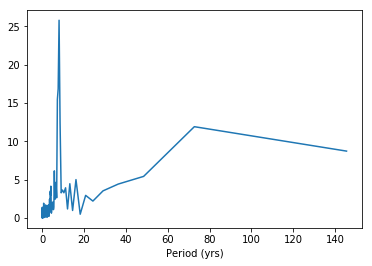

In [12]:
plt.plot(T,FR) #Διάγραμμα του πλάτους των συχνοτήτων για κάθε περίοδο
plt.xlabel('Period (yrs)')

Αναζητούμε τη περίοδο όπου το μετασχηματισμένο σήμα είναι μέγιστο. 

In [13]:
T[FR.argmax()]

8.0825555553644275

Παρατηρούμε ότι η παραπάνω τιμή είναι διαφορετική από την γνωστή η οποία είναι περίπου 11 έτη. Ο λόγος για τον οποίο παρατηρούμε αυτή τη διαφορά ενδέχεται να βρίσκεται στην εκτίμηση των χρονικών διαφορών dt. Για να το εξετάσουμε δημιουργούμε μια λίστα με $N-1$ στοιχεία ή οποία θα περιλαμβάνει όλες τις χρονικές διαφορές $dt=t_i-t_{i-1}$

In [14]:
dts=np.array([t[i]-t[i-1] for i  in range(1,N)])

(array([ 19067.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  53675.]),
 array([ 0.002 ,  0.0021,  0.0022,  0.0023,  0.0024,  0.0025,  0.0026,
         0.0027,  0.0028,  0.0029,  0.003 ]),
 <a list of 10 Patch objects>)

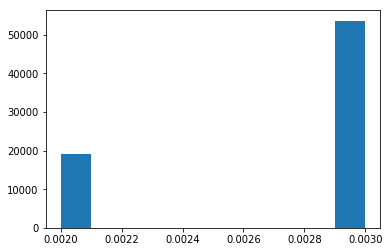

In [15]:
plt.hist(dts)

Παρατηρούμε ότι οντως οι χρονικές μεταβολές διαφέρουν. Αυτο μπορεί να οφείλεται στη δεκαδική μορφή των ημερομηνιων και να μπορει να διoρθωθει εκμεταλλευόμενοι ολόκληρη την ημερομηνια όπως δίνεται από τις στήλες 1-3.

Για λόγους εξάσκησης όμως θα υποθέσουμε οτι δεν έχουμε αυτη τη δυνατότητα και απλά έχουμε δεδομένα όπου οι παρατηρήσεις παρθηκαν σε μη τακτά χρονικά διαστήματα. 

Για να λύσουμε αυτό το πρόβλημα θα αντικαταστήσουμε τα πραγματικά δεδομένα με ένα γραμμμικό συνεχές (linear interpolation), ενώνοντας τα σημεία μεταξύ τους με ευθείες.  

In [18]:
from scipy.interpolate import interp1d
Rp=interp1d(t,R) #Δημιουργία ενος interpolated "συνεχούς" σήματος με βάση τα δεδομένα (t,s)
tt=np.linspace(t[0],t[-1],N) #Δημιουργία ενός "συνεχούς" ισοχρονικών διαστημάτων

0.00273788182881
11.7153963455


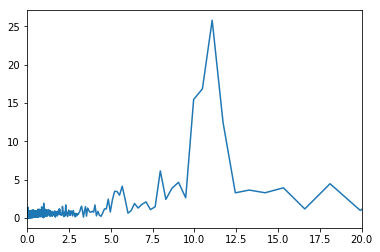

In [19]:
dt=tt[4]-tt[3]
print(dt)
freq=ff.fftfreq(N,d=dt)
fRp=np.abs(ff.fft(Rp(t)))/N
plt.plot(1./freq[freq>0],fRp[freq>0])
plt.xlim(0,20)
print(1./freq[fRp[freq>0].argmax()])

Μέσω τη παραπάνω μεθόδου παρατηρούμε ότι η τιμή είναι η αναμένομενη, στα 11.7 έτη. Στη συνέχεια θα παρουσιάσουμε πως μπορούμε να παράξουμε τα ίδια αποτελεσματα μέσω της βιβλιοθήκης ανάλυσης δεδομένων ```pandas``` όπου και θα χρησιμοιήσουμε την ακριβή ημερομηνία κάθε παρατήρησης. 

In [20]:
import pandas as pd

In [21]:
df=pd.read_csv('SN_d_tot_V2.0.csv',delimiter=';',
               names=['Year','Month','Day','Date_dec','R','dR','n','valid'])

In [22]:
df['Date']=pd.to_datetime(df[['Year','Month','Day']])
df.set_index('Date')
#df

,Year,Month,Day,Date_dec,R,dR,n,valid
Date,,,,,,,,
1818-01-01 00:00:00,1818,1,1,1818.001,-1,-1.0,0,1
1818-01-02 00:00:00,1818,1,2,1818.004,-1,-1.0,0,1
1818-01-03 00:00:00,1818,1,3,1818.007,-1,-1.0,0,1
1818-01-04 00:00:00,1818,1,4,1818.010,-1,-1.0,0,1
1818-01-05 00:00:00,1818,1,5,1818.012,-1,-1.0,0,1
1818-01-06 00:00:00,1818,1,6,1818.015,-1,-1.0,0,1
1818-01-07 00:00:00,1818,1,7,1818.018,-1,-1.0,0,1
1818-01-08 00:00:00,1818,1,8,1818.021,65,10.2,1,1
1818-01-09 00:00:00,1818,1,9,1818.023,-1,-1.0,0,1


In [23]:
N=df.shape[0]
freq=ff.fftfreq(df.shape[0],d=1.) #dt= 1 day
fs=np.abs(ff.fft(df['R']))/N

In [24]:
period=(1./freq[freq>0])/365.
MaxFs=period[fs[freq>0].argmax()]

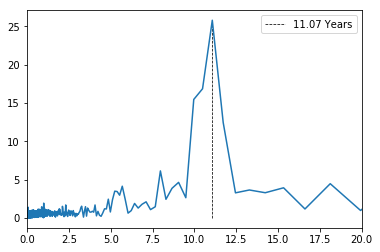

In [25]:
plt.plot(period,fs[freq>0]) 
plt.vlines(MaxFs,0,fs[freq>0].max(),linestyle='--',linewidth=0.75,label='{:.2f} Years'.format(MaxFs))
plt.xlim(0,20)
plt.legend()